# Numerical Solution model (solving for $r$ numerically)

Setting up redshift-space distortions model.
Reading covariance matrix: /Volumes/BlackIce/density_split/den_cats/Redshift/fullfit_cov/Galaxies_HOD_z0.57_Redshift_den1.CCF_gal_rmu.COV_0-100.npy
0.47272825720543027


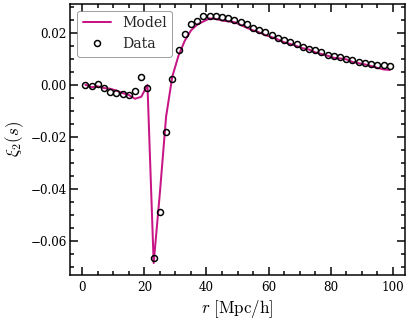

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jointfit import Model1
from cosmology import Cosmology
import emcee
import corner
%matplotlib inline
%matplotlib inline
plt.style.use('enrique')

root_real='/Volumes/BlackIce/density_split/den_cats/Real/'
root_redshift='/Volumes/BlackIce/density_split/den_cats/Redshift/'

idx = 1
xi_smu_obs_den1= root_redshift + "Galaxies_HOD_z0.57_Redshift_den{}.CCF_gal_rmu".format(idx)
xi_r_den1 = root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_gal_monopole".format(idx)
delta_r_den1 = root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_DM_monopole".format(idx)
v_r_den1 = root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_gal_vr".format(idx)
sv_den1 = root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_gal_svlos".format(idx)

idx = 5
xi_smu_obs_den5= root_redshift + "Galaxies_HOD_z0.57_Redshift_den{}.CCF_gal_rmu".format(idx)
xi_r_den5 = root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_gal_monopole".format(idx)
delta_r_den5 = root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_DM_monopole".format(idx)
v_r_den5 = root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_gal_vr".format(idx)
sv_den5 = root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_gal_svlos".format(idx)

xi_smu_obs = xi_smu_obs_den1 + ',' + xi_smu_obs_den5
xi_r = xi_r_den1 + ',' + xi_r_den5
delta_r = delta_r_den1 + ',' + delta_r_den5
sv = sv_den1 + ',' + sv_den5
smin = '0,0'
smax = '100,100'

covmat= root_redshift + 'fullfit_cov/Galaxies_HOD_z0.57_Redshift_den1.CCF_gal_rmu.COV_0-100.npy'

model = Model1(delta_r_files=delta_r, xi_r_files=xi_r, sv_files = sv,
                          xi_smu_files=xi_smu_obs, covmat_file=covmat, smins=smin, smaxs=smax)

true_sigma_v = 360
alpha = 1.0
true_epsilon = 1.0
true_alpha_para = alpha * true_epsilon ** (-2/3)
true_alpha_perp = true_epsilon * true_alpha_para
true_fs8 = model.f * model.s8norm
#true_bs8 = model.b * model.s8norm
idx = 'den0'
s = model.s_for_xi[idx]
mu = model.mu_for_xi[idx]

print(true_fs8)


xi0_model, xi2_model = model.theory_multipoles(true_fs8,
                                               true_sigma_v,
                                               true_alpha_perp,
                                               true_alpha_para,
                                               s,
                                               mu,
                                               idx)

xi0_obs = model.xi0_s[idx]
xi2_obs = model.xi2_s[idx]

fig, ax = plt.subplots(figsize=(6,5))

ax.plot(s, xi2_model, label='Model', lw=2.0, c='mediumvioletred')
ax.plot(s, xi2_obs, marker='o', mfc='none', mew=1.5, label='Data', c='k', ms=6.0, ls='')

ax.set_ylabel(r'$\xi_2(s)$', fontsize=17)
ax.set_xlabel(r'$r\ [\mathrm{Mpc/h}]$', fontsize=17)

ax.legend()
#plt.savefig('/Volumes/BlackIce/density_split/quadrupole_den{}_NumericalSolution_PlusVelDisp.pdf'.format(idx), format='pdf')
plt.show()

Setting up redshift-space distortions model.
Reading covariance matrix: /Volumes/BlackIce/density_split/den_cats/Redshift/fullfit_cov/Galaxies_HOD_z0.57_Redshift_den1.CCF_gal_rmu.COV_0-100.npy


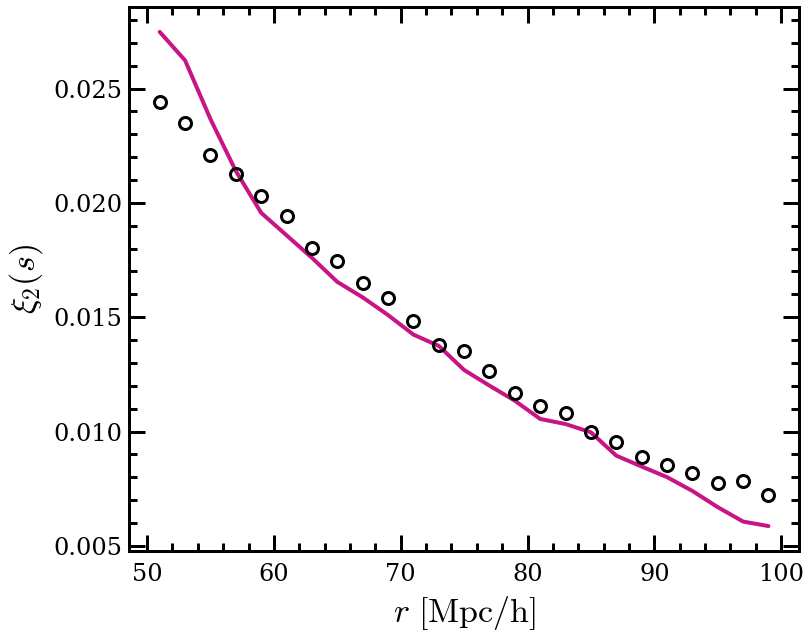

Setting up redshift-space distortions model.
Reading covariance matrix: /Volumes/BlackIce/density_split/den_cats/Redshift/fullfit_cov/Galaxies_HOD_z0.57_Redshift_den1.CCF_gal_rmu.COV_0-100.npy


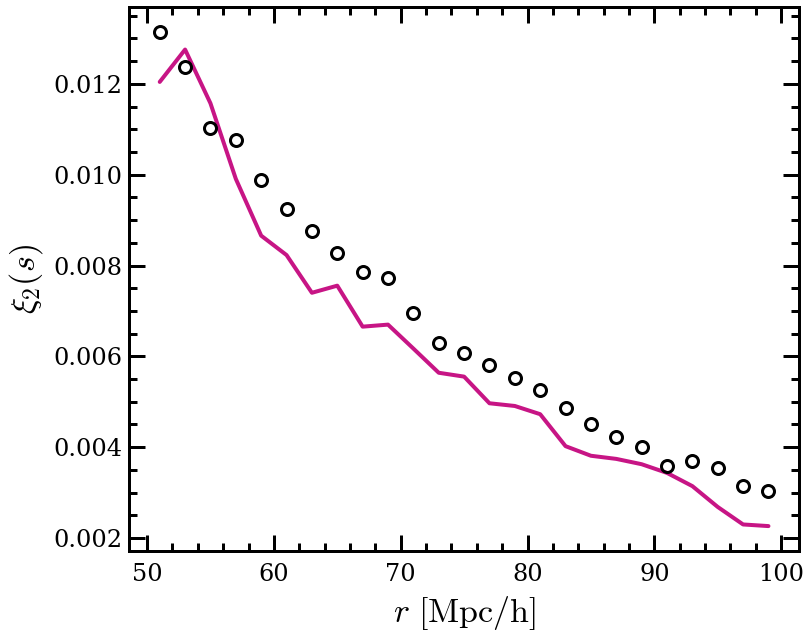

Setting up redshift-space distortions model.
Reading covariance matrix: /Volumes/BlackIce/density_split/den_cats/Redshift/fullfit_cov/Galaxies_HOD_z0.57_Redshift_den1.CCF_gal_rmu.COV_0-100.npy


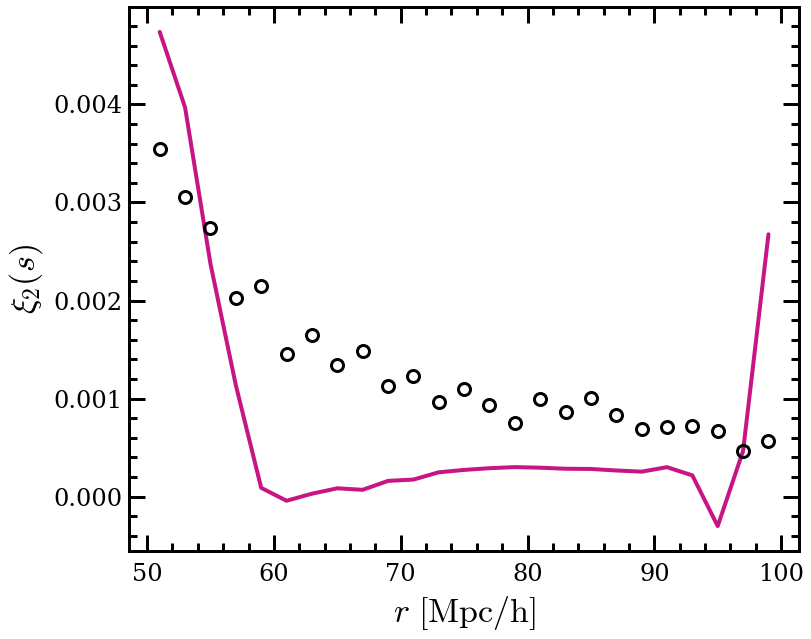

Setting up redshift-space distortions model.
Reading covariance matrix: /Volumes/BlackIce/density_split/den_cats/Redshift/fullfit_cov/Galaxies_HOD_z0.57_Redshift_den1.CCF_gal_rmu.COV_0-100.npy


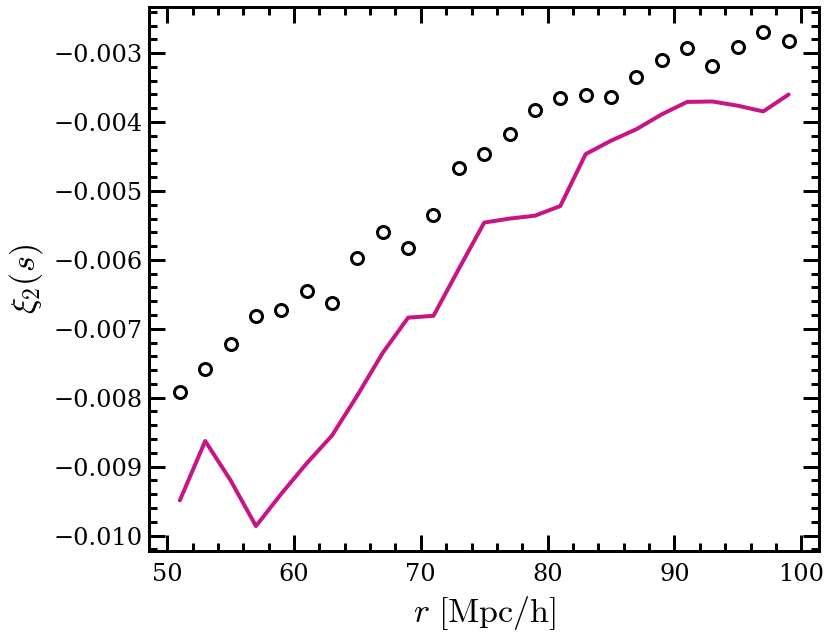

Setting up redshift-space distortions model.
Reading covariance matrix: /Volumes/BlackIce/density_split/den_cats/Redshift/fullfit_cov/Galaxies_HOD_z0.57_Redshift_den1.CCF_gal_rmu.COV_0-100.npy


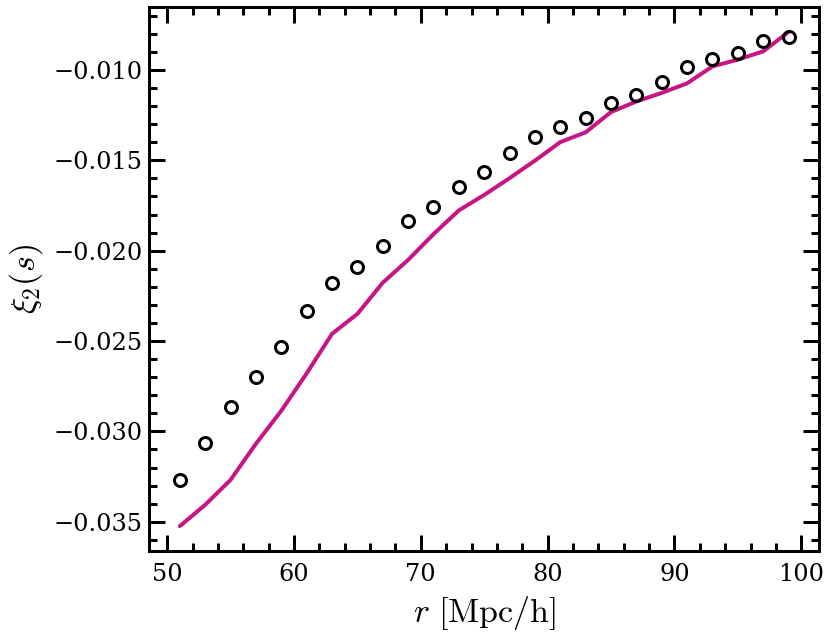

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from rsdmodel import Model1
from cosmology import Cosmology
import emcee
import corner
%matplotlib inline
%matplotlib inline
plt.style.use('enrique')

root_real='/Volumes/BlackIce/density_split/den_cats/Real/'
root_redshift='/Volumes/BlackIce/density_split/den_cats/Redshift/'

for idx in range(1,6):

    xi_smu_obs= root_redshift + "Galaxies_HOD_z0.57_Redshift_den{}.CCF_gal_rmu".format(idx)
    xi_r= root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_gal_monopole".format(idx)
    delta_r= root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_DM_monopole".format(idx)
    v_r= root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_gal_vr".format(idx)
    sv = root_real + "Galaxies_HOD_z0.57_Real_den{}.CCF_gal_svlos".format(idx)
    covmat= root_redshift + 'fullfit_cov/Galaxies_HOD_z0.57_Redshift_den1.CCF_gal_rmu.COV_0-100.npy'

    model = Model1(delta_r_file=delta_r, xi_r_file=xi_r, sv_file = sv,
                              xi_smu_file=xi_smu_obs, covmat_file=covmat, smin=50, smax=100)

    s = model.s_for_xi
    mu = model.mu_for_xi
    true_sigma_v = 360
    alpha = 1.0
    true_epsilon = 1.0
    true_alpha_para = alpha * true_epsilon ** (-2/3)
    true_alpha_perp = true_epsilon * true_alpha_para
    true_fs8 = model.f * model.s8norm
    true_bs8 = model.b * model.s8norm

    xi0_model, xi2_model = model.theory_multipoles(true_fs8,
                                                   true_sigma_v,
                                                   true_alpha_perp,
                                                   true_alpha_para,
                                                   s,
                                                   mu)

    xi0_obs = model.xi0_s
    xi2_obs = model.xi2_s

    fig, ax = plt.subplots(figsize=(6,5))

    ax.plot(s, xi2_model, label='Model', lw=2.0, c='mediumvioletred')
    ax.plot(s, xi2_obs, marker='o', mfc='none', mew=1.5, label='Data', c='k', ms=6.0, ls='')

    ax.set_ylabel(r'$\xi_2(s)$', fontsize=17)
    ax.set_xlabel(r'$r\ [\mathrm{Mpc/h}]$', fontsize=17)
    
    #plt.savefig('/Volumes/BlackIce/density_split/quadrupole_den{}_NumericalSolution_PlusVelDisp.pdf'.format(idx), format='pdf')
    plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from cosmology import Cosmology
import emcee
import corner

chain = '/Volumes/BlackIce/density_split/likelihood_analysis/\
Model1_Joint_FullFit_30,50-100,100.h2'

# true values from Minerva cosmology
#true_fs8 = CaiModel.fs8
#true_bs8 = CaiModel.bs8
#true_beta = true_fs8 / true_bs8
#true_epsilon = 1

# best fit values from emcee
reader = emcee.backends.HDFBackend(chain)
#flat_samples = reader.get_chain(discard=50, thin=15, flat=True)
flat_samples = reader.get_chain(flat=True)
best_fs8 = np.percentile(flat_samples[:, 0], 50)
#best_bs8 = np.percentile(flat_samples[:, 1], 50)

print('best_fs8: ' + str(best_fs8))
#print('true_bs8: ' + str(true_beta))

#print('best_epsilon: ' + str(best_epsilon))
#print('true_epsilon: ' + str(true_epsilon))

%config InlineBackend.figure_format='retina'
%matplotlib inline

# Corner
flat_samples = reader.get_chain(flat=True)
fig = corner.corner(flat_samples, labels=[r"$f \sigma_8$", r"$\sigma_{v1}$", r"$\sigma_{v2}$",
                    r"$\alpha_{\perp} / \alpha_{\parallel}$"],
                    show_titles=True, quantiles=[0.16, 0.84],
                    truths=[true_fs8, 360, 360, true_epsilon],
                    truth_color='r', label_kwargs={'fontsize':17}, title_kwargs={'fontsize':16})
#fout = '/Volumes/BlackIce/eboss/' + CaiModel.handle_obs.split('/')[-1] + '_emceeCorner.png'
#print('Saving corner: ' + fout)
plt.savefig('/Volumes/BlackIce/density_split/likelihood_analysis/Model1_Joint_FullFit_30,50-100,100.pdf2', format='pdf')
plt.show()

ndim=4
fig, axes = plt.subplots(ndim, figsize=(8, 7.5), sharex=True)
samples = reader.get_chain()
labels=[r"$f \sigma_8$",r"$\sigma_{v1}$", r"$\sigma_{v2}$",
        r"$\alpha_{\perp} / \alpha_{\parallel}$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], alpha=0.5)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

plt.subplots_adjust(hspace=0.05)
#plt.savefig('/Volumes/BlackIce/eboss/minerva_cats/minerva_model5_chains.pdf', format='pdf')

AttributeError: You must run the sampler with 'store == True' before accessing the results

best_fs8: 0.4370748382002179


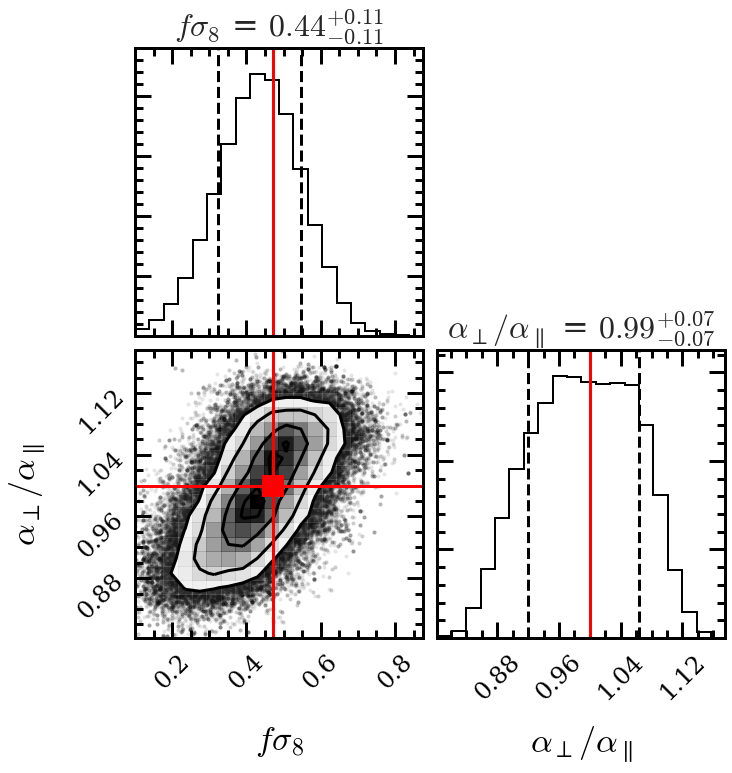

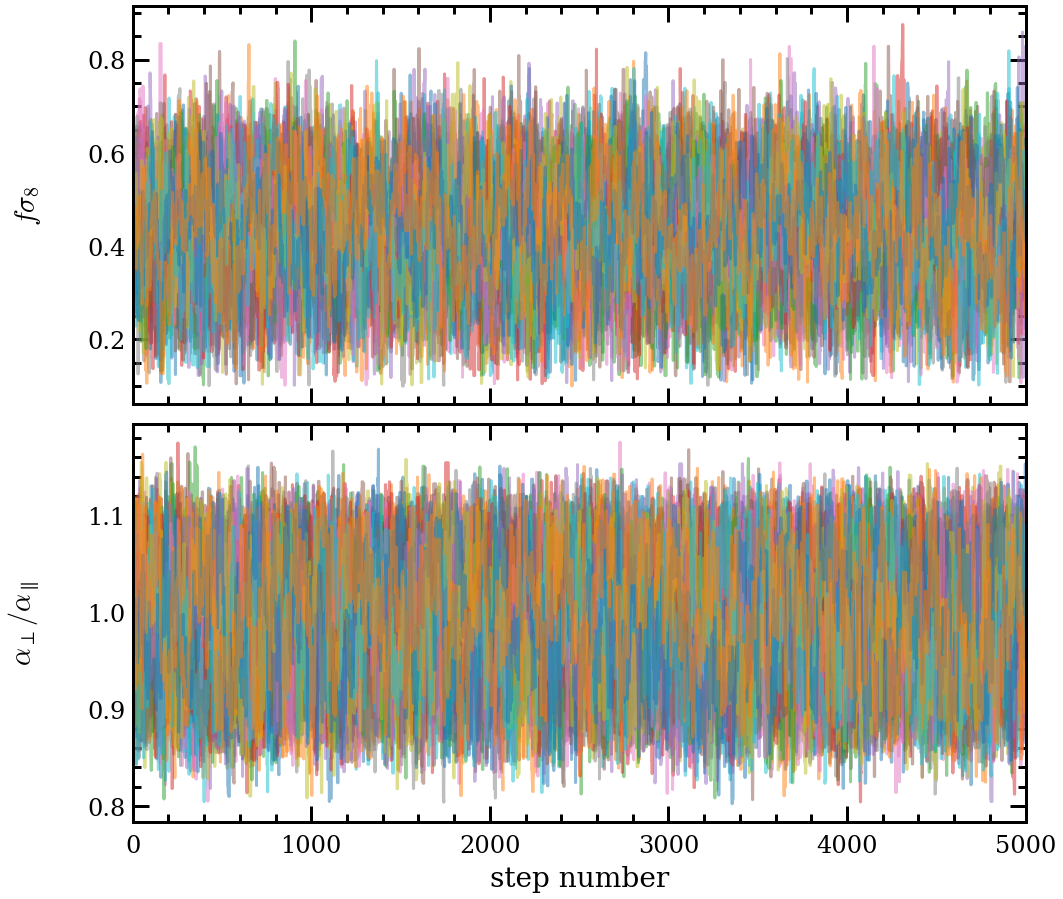

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from cosmology import Cosmology
import emcee
import corner

chain = '/Volumes/BlackIce/density_split/likelihood_analysis/\
Galaxies_HOD_z0.57_Redshift_den1.CCF_gal_rmu_Model2_FullFit_60.0-100.0.h5'

# true values from Minerva cosmology
#true_fs8 = CaiModel.fs8
#true_bs8 = CaiModel.bs8
#true_beta = true_fs8 / true_bs8
#true_epsilon = 1

# best fit values from emcee
reader = emcee.backends.HDFBackend(chain)
#flat_samples = reader.get_chain(discard=50, thin=15, flat=True)
flat_samples = reader.get_chain(flat=True)
best_fs8 = np.percentile(flat_samples[:, 0], 50)
#best_bs8 = np.percentile(flat_samples[:, 1], 50)

print('best_fs8: ' + str(best_fs8))
#print('true_bs8: ' + str(true_beta))

#print('best_epsilon: ' + str(best_epsilon))
#print('true_epsilon: ' + str(true_epsilon))

%config InlineBackend.figure_format='retina'
%matplotlib inline

# Corner
flat_samples = reader.get_chain(flat=True)
fig = corner.corner(flat_samples, labels=[r"$f \sigma_8$",
                    r"$\alpha_{\perp} / \alpha_{\parallel}$"],
                    show_titles=True, quantiles=[0.16, 0.84],
                    truths=[true_fs8, true_epsilon],
                    truth_color='r', label_kwargs={'fontsize':17}, title_kwargs={'fontsize':16})
#fout = '/Volumes/BlackIce/eboss/' + CaiModel.handle_obs.split('/')[-1] + '_emceeCorner.png'
#print('Saving corner: ' + fout)
plt.savefig('/Volumes/BlackIce/density_split/likelihood_analysis/Corner_FullFit_Model2_Den1_60-100Mpc_Linear.pdf', format='pdf')
plt.show()

ndim=2
fig, axes = plt.subplots(ndim, figsize=(8, 7.5), sharex=True)
samples = reader.get_chain()
labels=[r"$f \sigma_8$",
        r"$\alpha_{\perp} / \alpha_{\parallel}$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], alpha=0.5)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

plt.subplots_adjust(hspace=0.05)
#plt.savefig('/Volumes/BlackIce/eboss/minerva_cats/minerva_model5_chains.pdf', format='pdf')